### Plotting Circles for Mohr's Circle

Getting the basics figured out here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fig3, ax3 = plt.subplots()
ax3.scatter(forcedata, stretchdata,
            marker = 'x', color = 'green',
            label = "data")
ax3.plot(modelforce, modelstretch,
         color = 'blue', linestyle = ':',
         linewidth = 3., label = "model")

# plot the desired stretch (delta x) from back
# at the begining of the notebook
ax3.hlines(desired_stretch, 0, 40,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "maximum stretch of bungee")

# a way to set labels
plt.xlabel('Force produced by bungee (N)', fontsize = 10)
plt.ylabel('stretch of bungee (m)', fontsize = 10)
plt.title('2 m Bungee Cord', fontsize = 20)

# set limits for good utility
ax1.set_xlim([38,40])
ax1.set_ylim([3.1,3.3])
fig3.set_size_inches(10, 9)
ax3.grid()

plt.legend(loc= 2)
plt.show()

### Decoding the Stress Tensor:

I need to provide some description here of the meaning of the terms in the 2D stress tensor below. In a planar stress problem we are looking at the 

$$\begin{matrix}\sigma_H & \tau_H \\ \tau_V & \sigma_V\end{matrix}$$

In [45]:
"""Plot Mohr circle for a 2D tensor"""
S = np.array([[1.0, 2.0],[2.0, -3.0]])
S11 = S[0,0] 
S12 = S[0,1] 
S21 = S[1,0]
S22 = S[1,1] 

### Define Circle Parameters:

Center and radius

In [54]:
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
center = [(S11 + S22)/2.0, 0.0]
radius = np.sqrt((S11 - S22)**2/4.0 + S12**2)
circleX = center[0] + radius * np.cos( angle ) 
circleY = center[1] + radius * np.sin( angle ) 

# Sort out plotting limits
circleXmin = center[0] - radius
circleXmax = center[0] + radius

# where is circle on grid - span y axis, left of y axis, right of y axis

limScale = 1.5 
if circleXmin > 0.:
    leftLim = -1.
    rightLim = limScale*circleXmax
else:
    if circleXmax < 0.:
        rightLim = 1.
        leftLim = limScale*circleXmin
    else:
        leftLim = limScale*circleXmin
        rightLim = limScale*circleXmax

# End points of line on Mohrs Circle
pointSize = 20. # set possible size of point on plot
leftEnd = [S11, -S21]
rightEnd = [S22, S12]
endX = [leftEnd[0], rightEnd[0]]
endY = [leftEnd[1], rightEnd[1]]
        
# debug tools
print('leftLim', leftLim)
print('rightLim', rightLim)
print('radius', radius)
print('center', center)


leftLim -5.742640687119286
rightLim 2.7426406871192857
radius 2.8284271247461903
center [-1.0, 0.0]


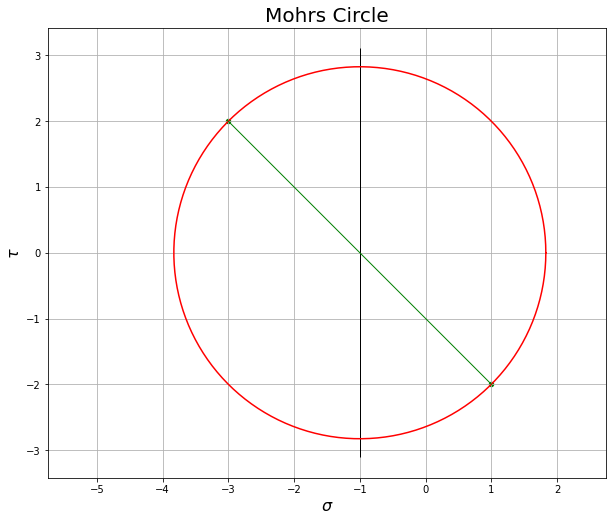

In [56]:
fig1, ax1 = plt.subplots()
ax1.plot(circleX, circleY, color = 'red')

ax1.scatter(leftEnd[0], leftEnd[1], marker = 'o', s = pointSize, color = 'green')
ax1.scatter(rightEnd[0], rightEnd[1], marker = 'o', s = pointSize, color = 'green')
ax1.plot(endX, endY, linewidth = 1.,color = 'green')

# a way to set labels
plt.xlabel(r"$\sigma$", fontsize = 16)
plt.ylabel(r"$\tau$", fontsize = 16)
plt.title('Mohrs Circle', fontsize = 20)

# set limits for good utility
ax1.set_xlim([leftLim,rightLim])
ax1.set_aspect('equal') # set aspect ratio so circle looks like a cirle - cool!

# reference lines of various sorts
ax1.vlines(center[0], -1.1*radius, +1.1*radius,
         color = 'black', linestyle = '-',
         linewidth = 1. , label = "average normal stress")


fig1.set_size_inches(10, 9)
ax1.grid()

#plt.legend(loc= 2)
plt.show()